# Page snippet

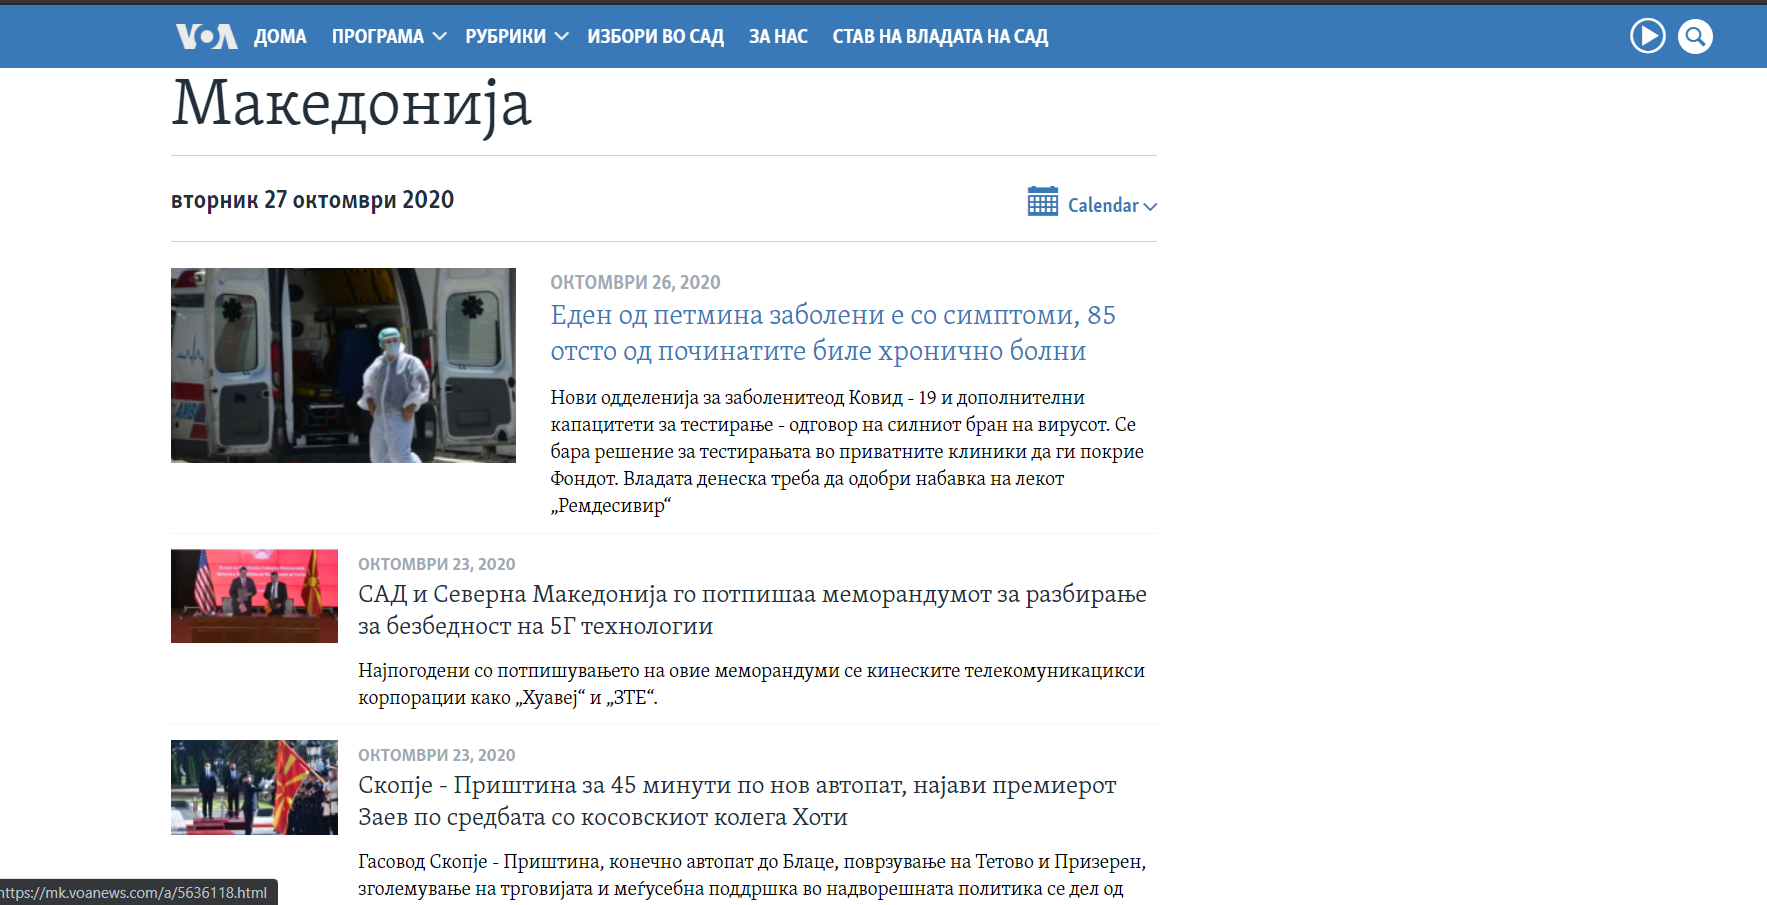

# Import libraries

In [ ]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from IPython.display import HTML

requests.packages.urllib3.disable_warnings()

import warnings
warnings.filterwarnings("ignore")

# HTTP Request

In [ ]:
url = "https://mk.voanews.com/z/1729"
shapshot = requests.get(url)

2020-10-27 23:14:38 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): mk.voanews.com:443
2020-10-27 23:14:38 [urllib3.connectionpool] DEBUG: https://mk.voanews.com:443 "GET /z/1729 HTTP/1.1" 200 12058


In [ ]:
shapshot

<Response [200]>

# Parse HTML with BeautifulSoup

In [ ]:
shapshot = requests.get(url)
raw_html = shapshot.text
soup = BeautifulSoup(raw_html, 'html.parser')

2020-10-27 23:14:38 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): mk.voanews.com:443
2020-10-27 23:14:38 [urllib3.connectionpool] DEBUG: https://mk.voanews.com:443 "GET /z/1729 HTTP/1.1" 200 12058


In [ ]:
soup


<!DOCTYPE html>

<html class="no-js" dir="ltr" lang="mk">
<head>
<link href="/Content/responsive/VOA/mk-MK/VOA-mk-MK.css?&amp;av=0.1.0.0&amp;cb=148" rel="stylesheet"/>
<script src="//tags.tiqcdn.com/utag/bbg/voa-pangea/prod/utag.sync.js"></script> <script src="https://www.youtube.com/iframe_api" type="text/javascript"></script>
<script type="text/javascript">
//a general 'js' detection, must be on top level in <head>, due to CSS performance
document.documentElement.className = "js";
var cacheBuster = "148";
var appBaseUrl = "/";
var imgEnhancerBreakpoints = [0, 144, 256, 408, 650, 1023, 1597];
var isLoggingEnabled = true;
var isPreviewPage = false;
var isLivePreviewPage = false;
var pwaEnabled = false;
var swCacheDisabled;
</script>
<meta charset="utf-8"/>
<title>Македонија</title>
<meta content="Македонија" name="title"/>
<meta content="Македонија" name="description"/>
<meta content="Македонија" name="keywords"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>

# Extracting data

The attributes that I will use are the articles' title, their publishing date and their picture. 

class .media-block__title to get the article's title

class .date to get the article's publishing date

class .thumb and data-src attribute for the article's picture

For all of the aforementioned selectors, the selector div.media-block-wrap is also used to select the parent div element.


In [ ]:
title = soup.select_one('div.media-block-wrap .media-block__title')
date = soup.select_one('div.media-block-wrap .date')
img = soup.select_one('div.media-block-wrap .thumb')

print(str(title.prettify()))
print(str(date.prettify()))
print(str(img.prettify()))

<h4 class="media-block__title media-block__title--size-2" title="628 новозаболени во последното деноноќие, вирусот однесе уште 15 животи">
 628 новозаболени во последното деноноќие, вирусот однесе уште 15 животи
</h4>

<span class="date date--mb date--size-2">
 октомври 27, 2020
</span>

<div class="thumb thumb16_9">
 <img alt=" " data-src="https://gdb.voanews.com/D5BDD086-6B74-4698-9676-DB8F759B34B6_cx0_cy5_cw0_w100_r1.jpg" src=""/>
</div>



In [ ]:
list_titles = soup.select('div.media-block-wrap .media-block__title')

In [ ]:
list_dates = soup.select('div.media-block-wrap .date')

In [ ]:
list_images = soup.select('div.media-block-wrap .thumb')

## List of the extracted elements

In [ ]:
titles = []
for i in range(0,len(list_titles)):
  titles.append(list_titles[i].get('title', 'No title attribute'))

dates = []
for i in range(0, len(list_dates)):
  dates.append(list_dates[i].text)

images = []
for i in range(0, len(list_images)):
  images.append(list_images[i].select_one('img').get('data-src', 'No src attribute'))


In [ ]:
print(titles)
print(dates)
print(images)

['628 новозаболени во последното деноноќие, вирусот однесе уште 15 животи', 'Како забраната на работни визи во САД се одрази врз македонскиот студент Игор Томески?', 'Еден од петмина заболени е со симптоми, 85 отсто од починатите биле хронично болни', 'САД и Северна Македонија го потпишаа меморандумот за разбирање за безбедност на 5Г технологии', 'Скопје - Приштина за 45 минути по нов автопат, најави премиерот Заев по средбата со косовскиот колeга Хоти ', 'Инфективните оддленија речиси полни со пациенти, 640 новозаболени во едно деноноќие', 'Македонската Влада очекува старт на преговори со ЕУ во декември', 'Пратениците на ВМРО-ДПМНЕ да покажат одговорност и итно да гласаат за мерките за заштита од вирусот, апелира власта', 'Владата со нови рестриктивни мерки, се чека на Собранието да ги усвои претходните', 'Колку македонските граѓани веруваат во судскиот систем?', 'Со партиски пари Груевски купил плацови на Водно, неговиот кум заврши во притвор', 'Ситуацијата е сериозна, следен чекор е

In [ ]:
len(titles) == len(dates) == len(images)

True

# Create a DataFrame

In [ ]:
matrix = []
for i in range(0, len(titles)):
  matrix.append([titles[i], dates[i], images[i]])

df = pd.DataFrame(np.array(matrix), columns=['Titles', 'Publishing Date', 'Image'])

In [ ]:
def path_to_image(path):
  return '<img src="' + path + '" width="60" />'

df.to_html(escape=False, formatters=dict(Image = path_to_image))

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Titles</th>\n      <th>Publishing Date</th>\n      <th>Image</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>628 новозаболени во последното деноноќие, вирусот однесе уште 15 животи</td>\n      <td>октомври 27, 2020</td>\n      <td><img src="https://gdb.voanews.com/D5BDD086-6B74-4698-9676-DB8F759B34B6_cx0_cy5_cw0_w100_r1.jpg" width="60" /></td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>Како забраната на работни визи во САД се одрази врз македонскиот студент Игор Томески?</td>\n      <td>октомври 27, 2020</td>\n      <td><img src="https://gdb.voanews.com/d4716250-c0da-48c8-adf9-1a229ad5c422_tv_w66_r1.jpg" width="60" /></td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>Еден од петмина заболени е со симптоми, 85 отсто од починатите биле хронично болни</td>\n      <td>октомври 26, 2020</td>\n      <td><img src="https://gdb.voanews.com/4

In [ ]:
HTML(df.to_html(escape=False, formatters=dict(Image = path_to_image)))

,Titles,Publishing Date,Image
0,"628 новозаболени во последното деноноќие, вирусот однесе уште 15 животи","октомври 27, 2020",
1,Како забраната на работни визи во САД се одрази врз македонскиот студент Игор Томески?,"октомври 27, 2020",
2,"Еден од петмина заболени е со симптоми, 85 отсто од починатите биле хронично болни","октомври 26, 2020",
3,САД и Северна Македонија го потпишаа меморандумот за разбирање за безбедност на 5Г технологии,"октомври 23, 2020",
4,"Скопје - Приштина за 45 минути по нов автопат, најави премиерот Заев по средбата со косовскиот колeга Хоти","октомври 23, 2020",
5,"Инфективните оддленија речиси полни со пациенти, 640 новозаболени во едно деноноќие","октомври 22, 2020",
6,Македонската Влада очекува старт на преговори со ЕУ во декември,"октомври 22, 2020",
7,"Пратениците на ВМРО-ДПМНЕ да покажат одговорност и итно да гласаат за мерките за заштита од вирусот, апелира власта","октомври 21, 2020",
8,"Владата со нови рестриктивни мерки, се чека на Собранието да ги усвои претходните","октомври 20, 2020",
9,Колку македонските граѓани веруваат во судскиот систем?,"октомври 19, 2020",


# Extract data using Selenium

I used the webpage https://www.reddit.com/r/europe/.



In [ ]:
#requirements for colab
# install chromium, its driver, and selenium
!apt update
!apt install chromium-chromedriver
!pip install selenium
# set options to be headless, ..
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
wd = webdriver.Chrome(options=options)
wd.get("https://www.reddit.com/r/europe/")
print(wd.page_source)  # results
# divs = wd.find_elements_by_css_selector('div')

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done
Building dependency tree       
Reading state information... Done
58 packages can be upgraded. Run '

2020-10-27 23:16:11 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:44853/session {"capabilities": {"firstMatch": [{}], "alwaysMatch": {"browserName": "chrome", "platformName": "any", "goog:chromeOptions": {"extensions": [], "args": ["--headless", "--no-sandbox", "--disable-dev-shm-usage"]}}}, "desiredCapabilities": {"browserName": "chrome", "version": "", "platform": "ANY", "goog:chromeOptions": {"extensions": [], "args": ["--headless", "--no-sandbox", "--disable-dev-shm-usage"]}}}
2020-10-27 23:16:11 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): 127.0.0.1:44853
2020-10-27 23:16:11 [urllib3.connectionpool] DEBUG: http://127.0.0.1:44853 "POST /session HTTP/1.1" 200 684
2020-10-27 23:16:11 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2020-10-27 23:16:11 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:44853/session/052415498a18a6c7059c9b2166d1bb8e/url {"url": "https://www.reddit.com/r/europ

<html lang="en-US"><head><link href="//c.aaxads.com/aax.js?pub=AAX763KC6&amp;hst=www.reddit.com&amp;ver=1.2" rel="preload" as="script"><link href="//c.amazon-adsystem.com/aax2/apstag.js" rel="preload" as="script"><link href="//www.googletagservices.com/tag/js/gpt.js" rel="preload" as="script"><script src="//c.aaxads.com/aax.js?pub=AAX763KC6&amp;hst=www.reddit.com&amp;ver=1.2" async=""></script><script src="//www.googletagservices.com/tag/js/gpt.js" async=""></script><script src="//c.amazon-adsystem.com/aax2/apstag.js" async=""></script><script>
    var __SUPPORTS_TIMING_API = typeof performance === 'object' && !!performance.mark && !! performance.measure && !!performance.getEntriesByType;
    function __perfMark(name) { __SUPPORTS_TIMING_API && performance.mark(name); };
    var __firstPostLoaded = false;
    function __markFirstPostVisible() {
      if (__firstPostLoaded) { return; }
      __firstPostLoaded = true;
      __perfMark("first_post_title_image_loaded");
    }
    var __fir

In [ ]:
# ._eYtD2XCVieq6emjKBH3m - class for titles
# ._23wugcdiaj44hdfugIAlnX.oQctV4n0yUb0uiHDdGnmE - class for user
# ._3jOxDPIQ0KaOWpzvSQo-1s - class for time of the post

sel_titles = wd.find_elements_by_css_selector('h3._eYtD2XCVieq6emjKBH3m')
final_titles = []
for title in sel_titles:
  final_titles.append(title.get_attribute('innerHTML'))

In [ ]:
sel_authors = wd.find_elements_by_css_selector('._23wugcdiaj44hdfugIAlnX.oQctV4n0yUb0uiHDdGnmE')
final_authors = []
for author in sel_authors:
  final_authors.append(author.get_attribute('innerHTML'))

In [ ]:
sel_dates = wd.find_elements_by_css_selector('._3jOxDPIQ0KaOWpzvSQo-1s')
final_dates = []
for date in sel_dates:
  final_dates.append(date.get_attribute('innerHTML'))

In [ ]:
matrix = []
for i in range(0, len(final_titles)):
  matrix.append([final_titles[i], final_authors[i], final_dates[i]])

data_reddit = pd.DataFrame(np.array(matrix), columns=['Title', 'Author', 'Date'])
data_reddit

,Title,Author,Date
0,What happened in your country this week? — 202...,u/AutoModerator,2 days ago
1,Polish protests megathread,u/pothkan,1 day ago
2,Iran's depiction of Macron doesn't look like t...,u/nonoman12,5 hours ago
3,Classification of EU regions,u/Trumpetshow,16 hours ago
4,Spain: While citizens are restricted to 6 peop...,u/Maikel90,7 hours ago
5,Azerbaijan McDonalds &amp; BurgerKing branches...,u/Siberian_644,7 hours ago
6,"Today, opposition in the Polish Parliament blo...",u/B1Rabbit,13 hours ago
7,PiS leader Kaczyński calls on Poles to defend ...,u/xorrag,4 hours ago
8,Pakistan foreign minister passes resolution in...,u/kambalkeeda,7 hours ago
9,Finns have enjoyed their time in Covid-19 isol...,u/vanhasenlautakasa,4 hours ago
